In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import folium

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco'
html_data = requests.get(url).text

In [3]:
soup = BeautifulSoup(html_data, 'html.parser')

In [4]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of neighborhoods in San Francisco - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fc01f9f2-23f0-41f8-9759-1082f1e84433","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighborhoods_in_San_Francisco","wgTitle":"List of neighborhoods in San Francisco","wgCurRevisionId":1020659854,"wgRevisionId":1020659854,"wgArticleId":1487556,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","Webarchive template archiveis links","

In [5]:
soup.body.li.a

<a href="#Alamo_Square"><span class="tocnumber">1</span> <span class="toctext">Alamo Square</span></a>

In [6]:
neighborhoods = []
for line in soup.find_all('a'):
    for a in line.find_all('span'):
        string = str(a)

        if 'toctext' in string: 
            string = string.split('>')
            string = string[1].split('<')
            string = string[0]
            neighborhoods.append(string)
            
print(neighborhoods)

['Alamo Square', 'Anza Vista', 'Ashbury Heights', 'Balboa Hollow', 'Balboa Terrace', 'Bayview', 'Belden Place', 'Bernal Heights', 'Buena Vista', 'Butchertown (Old and New)', 'Castro', 'Cathedral Hill', 'Cayuga Terrace', 'China Basin', 'Chinatown', 'Civic Center', 'Clarendon Heights', 'Cole Valley', 'Corona Heights', 'Cow Hollow', 'Crocker-Amazon', 'Design District', 'Diamond Heights', 'Dogpatch', 'Dolores Heights', 'Duboce Triangle', 'Embarcadero', 'Eureka Valley', 'Excelsior', 'Fillmore', 'Financial District', 'Financial District South', "Fisherman's Wharf", 'Forest Hill', 'Forest Knolls', 'Glen Park', 'Golden Gate Heights', 'Haight-Ashbury', 'Hayes Valley', 'Hunters Point', 'India Basin', 'Ingleside', 'Ingleside Terraces', 'Inner Sunset', 'Irish Hill', 'Islais Creek', 'Jackson Square', 'Japantown', 'Jordan Park', 'Laguna Honda', 'Lake Street', 'Lakeside', 'Lakeshore', 'Laurel Heights', 'Lincoln Manor', 'Little Hollywood', 'Little Russia', 'Little Saigon', 'Lone Mountain', 'Lower Haig

In [7]:
for i in range(0,4):
    del neighborhoods[-1]

In [8]:
sanfran = pd.DataFrame(neighborhoods)

In [9]:
sanfran.columns=['Neighborhood']

In [10]:
sanfran.head()

,Neighborhood
0,Alamo Square
1,Anza Vista
2,Ashbury Heights
3,Balboa Hollow
4,Balboa Terrace


In [11]:
place = 'San Francisco, California, USA'

geolocator = Nominatim(user_agent="usa_explorer")
location = geolocator.geocode(place)
latitude_sf = location.latitude
longitude_sf = location.longitude
print('The geograpical coordinates of San Francisco are {}, {}.'.format(latitude_sf, longitude_sf))

The geograpical coordinates of San Francisco are 37.7790262, -122.419906.


In [12]:
#Getting coordinates for each zipcode using geocoder
coordinates = {}

for neighborhood in neighborhoods:
        
    geolocator = Nominatim(user_agent = 'usa_explorer')

    location = geolocator.geocode('{}, San Francisco, USA'.format(neighborhood))
    
    try:
        latitude = location.latitude    
    except Exception:
        latitude = 'NaN'
    
    try:
        longitude = location.longitude
    except Exception:
        longitude = 'NaN'

    coordinates[neighborhood] = [latitude, longitude]
coord_df = pd.DataFrame(coordinates)

In [13]:
coord_df.head()

,Alamo Square,Anza Vista,Ashbury Heights,Balboa Hollow,Balboa Terrace,Bayview,Belden Place,Bernal Heights,Buena Vista,Butchertown (Old and New),...,Union Square,University Mound,Upper Market,Visitacion Valley,Vista del Mar,West Portal,Western Addition,Westwood Highlands,Westwood Park,Yerba Buena
0,37.77636,37.780836,33.767144,37.798794,32.809471,37.728889,37.791744,37.742986,37.806532,NaN,...,37.787936,37.723887,40.707120,37.712132,37.396164,37.741141,37.779559,40.985684,33.543768,18.455092
1,-122.43470,-122.443149,-84.274288,-122.436098,-117.208557,-122.392500,-122.403886,-122.415804,-122.420648,NaN,...,-122.407517,-122.410594,-74.009484,-122.409713,-121.834058,-122.465634,-122.429810,-74.018737,-89.287312,-66.069011


In [14]:
sf_coordinates = coord_df.T

In [15]:
sf_coordinates.rename(columns={0: 'Latitude', 1: 'Longitude'}, inplace=True)
sf_coordinates

,Latitude,Longitude
Alamo Square,37.7764,-122.435
Anza Vista,37.7808,-122.443
Ashbury Heights,33.7671,-84.2743
Balboa Hollow,37.7988,-122.436
Balboa Terrace,32.8095,-117.209
...,...,...
West Portal,37.7411,-122.466
Western Addition,37.7796,-122.43
Westwood Highlands,40.9857,-74.0187
Westwood Park,33.5438,-89.2873


In [16]:
sf_coordinates.reset_index(drop=False, inplace=True)

In [17]:
sf_coordinates.shape

(119, 3)

In [18]:
sf_coordinates.rename(columns={'index': 'Neighborhood'}, inplace=True)

In [19]:
pd.set_option('display.max_rows', 500)
sf_coordinates

,Neighborhood,Latitude,Longitude
0,Alamo Square,37.7764,-122.435
1,Anza Vista,37.7808,-122.443
2,Ashbury Heights,33.7671,-84.2743
3,Balboa Hollow,37.7988,-122.436
4,Balboa Terrace,32.8095,-117.209
5,Bayview,37.7289,-122.392
6,Belden Place,37.7917,-122.404
7,Bernal Heights,37.743,-122.416
8,Buena Vista,37.8065,-122.421
9,Butchertown (Old and New),NaN,NaN


In [20]:
nulls = sf_coordinates.loc[(sf_coordinates['Latitude']=='NaN')]
nulls

,Neighborhood,Latitude,Longitude
9,Butchertown (Old and New),NaN,NaN
42,Ingleside Terraces,NaN,NaN
55,Little Hollywood,NaN,NaN
56,Little Russia,NaN,NaN
61,Lower Nob Hill,NaN,NaN
67,Miraloma Park,NaN,NaN
79,Outer Mission,NaN,NaN
80,Outer Sunset,NaN,NaN
85,Polk Gulch,NaN,NaN


In [21]:
sf_coordinates.replace(['Butchertown (Old and New)'], 'Butchertown', inplace=True)

In [22]:
wrong_coords = ['Vista del Mar', 
                'Parkside', 
                'Lakeside', 
                'Lincoln Manor', 
                'Mid-Market', 
                'Lakeshore', 
                'Portola Place', 
                'Balboa Terrace', 
                'Sunnyside', 
                'Cathedral Hill', 
                'Jackson Square', 
                'Design District', 
                'Yerba Buena', 
                'Westwood Park', 
                'Sherwood Forest', 
                'Monterey Heights', 
                'Ashbury Heights', 
                'Forest Knolls', 
                'Mission Terrace', 
                'Diamond Heights', 
                'Midtown Terrace', 
                'Golden Gate Heights', 
                'Laurel Heights', 
                'Cayuga Terrace', 
                'Westwood Highlands', 
                'Sea Cliff', 
                'Upper Market', 
                'South End']

Since I need these neighborhoods and their coordinates, I need to see if I can find this information elsewhere on the web. Normally I wouldn't do this with a dataset, but because I have to compile the data myself, it is part of what I need to do to complete my dataset.

In [23]:
nulls_dict = [{'Neighborhood': 'Butchertown', 'Latitude': 37.74347, 'Longitude': -122.38476},
              {'Neighborhood': 'Inglewood Terraces', 'Latitude': 37.725, 'Longitude': -122.46861},
              {'Neighborhood': 'Little Hollywood', 'Latitude': 37.71145, 'Longitude': -122.39843},
              {'Neighborhood': 'Little Russia', 'Latitude': 37.7802, 'Longitude': -122.4817},
              {'Neighborhood': 'Lower Nob Hill', 'Latitude': 37.7890, 'Longitude': -122.4109},
              {'Neighborhood': 'Miraloma Park', 'Latitude': 37.7383, 'Longitude': -122.4533},
              {'Neighborhood': 'Outer Mission', 'Latitude': 37.7157, 'Longitude': -122.4458},
              {'Neighborhood': 'Outer Sunset', 'Latitude': 37.7467, 'Longitude': -122.4863},
              {'Neighborhood': 'Polk Gulch', 'Latitude': 37.7896, 'Longitude': -122.4205}]

In [24]:
index = list(nulls.index)

for i in range(len(index)):
    sf_coordinates.iloc[index[i]] = nulls_dict[i]
    

In [25]:
wrongs_dict = [{'Neighborhood': 'Vista del Mar', 'Latitude': 37.7789 , 'Longitude': -122.5076}, 
               {'Neighborhood': 'Parkside', 'Latitude': 37.7330, 'Longitude': -122.4786}, 
               {'Neighborhood': 'Lakeside', 'Latitude': 37.7265, 'Longitude': -122.4734}, 
               {'Neighborhood': 'Lincoln Manor', 'Latitude': 37.7806, 'Longitude': -122.4978}, 
               {'Neighborhood': 'Mid-Market', 'Latitude': 37.7805, 'Longitude': -122.4125}, 
               {'Neighborhood': 'Lakeshore', 'Latitude': 37.7233, 'Longitude': -122.4887}, 
               {'Neighborhood': 'Portola Place', 'Latitude': 37.7280, 'Longitude': -122.3976},
               {'Neighborhood': 'Balboa Terrace', 'Latitude': 37.7313, 'Longitude': -122.4687}, 
               {'Neighborhood': 'Sunnyside', 'Latitude': 37.7307, 'Longitude': -122.4466}, 
               {'Neighborhood': 'Cathedral Hill', 'Latitude': 37.7842, 'Longitude': -122.4254}, 
               {'Neighborhood': 'Jackson Square', 'Latitude': 37.7970, 'Longitude': -122.4032}, 
               {'Neighborhood': 'Design District', 'Latitude': 37.7690, 'Longitude': -122.4019}, 
               {'Neighborhood': 'Yerba Buena', 'Latitude': 37.7850, 'Longitude': -122.4005}, 
               {'Neighborhood': 'Westwood Park', 'Latitude': 37.7261, 'Longitude': -122.4566}, 
               {'Neighborhood': 'Sherwood Forest', 'Latitude': 37.7368, 'Longitude': -122.4588}, 
               {'Neighborhood': 'Monterey Heights', 'Latitude': 37.7323, 'Longitude': -122.4616}, 
               {'Neighborhood': 'Ashbury Heights', 'Latitude': 37.7692, 'Longitude': -122.4481}, 
               {'Neighborhood': 'Forest Knolls', 'Latitude': 37.7586, 'Longitude': -122.4595}, 
               {'Neighborhood': 'Mission Terrace', 'Latitude': 37.7246, 'Longitude': -122.4434}, 
               {'Neighborhood': 'Diamond Heights', 'Latitude': 37.7424, 'Longitude': -122.4425}, 
               {'Neighborhood': 'Midtown Terrace', 'Latitude': 37.7508, 'Longitude': -122.4538}, 
               {'Neighborhood': 'Golden Gate Heights', 'Latitude': 37.7527, 'Longitude': -122.4708}, 
               {'Neighborhood': 'Laurel Heights', 'Latitude': 37.7850, 'Longitude': -122.4510}, 
               {'Neighborhood': 'Cayuga Terrace', 'Latitude': 37.7246, 'Longitude': -122.4400}, 
               {'Neighborhood': 'Westwood Highlands', 'Latitude': 37.7333, 'Longitude': -122.4566}, 
               {'Neighborhood': 'Sea Cliff', 'Latitude': 37.7859, 'Longitude': -122.4907}, 
               {'Neighborhood': 'Upper Market', 'Latitude': 37.7543, 'Longitude': -122.4436}, 
               {'Neighborhood': 'South End', 'Latitude': 37.8077, 'Longitude': -122.4211}
              ]

In [26]:
index_ = []

for i in range(len(wrongs_dict)):
    for j, place in zip(sf_coordinates.index, sf_coordinates['Neighborhood']):

        if place == wrongs_dict[i]['Neighborhood']:
            index_.append(j)
            
print(index_)

[113, 83, 51, 54, 66, 52, 87, 4, 103, 11, 46, 21, 118, 117, 96, 72, 2, 34, 71, 22, 65, 36, 53, 12, 116, 95, 111, 99]


In [27]:
for i in range(len(index_)):
    sf_coordinates.iloc[index_[i]] = wrongs_dict[i]    

In [28]:
sf_coordinates.head()

,Neighborhood,Latitude,Longitude
0,Alamo Square,37.7764,-122.435
1,Anza Vista,37.7808,-122.443
2,Ashbury Heights,37.7692,-122.448
3,Balboa Hollow,37.7988,-122.436
4,Balboa Terrace,37.7313,-122.469


In [29]:
place = 'San Francisco, California, USA'

geolocator = Nominatim(user_agent="usa_explorer")
location = geolocator.geocode(place)
latitude_sf = location.latitude
longitude_sf = location.longitude

In [30]:
# Create a map of San Francisco using latitude and longitude values
sf_map = folium.Map(location=[latitude_sf, longitude_sf], zoom_start=11)

# add markers to map
for lat, long, label in zip(sf_coordinates['Latitude'], sf_coordinates['Longitude'], sf_coordinates['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#9932CC',
        fill_opacity=1.0,
        parse_html=False).add_to(sf_map)  
    
sf_map

In [31]:
sf_coordinates.to_csv('sf_coordinates.csv')

Now I can transfer this dataset to my larger project.

In [32]:
CLIENT_ID = '1C5FNR3DHPIMLJ1Q50UATVX01G1SJVJXJUUMLYZR0ZRHETVI' # your Foursquare ID
CLIENT_SECRET = 'K2QCAXY0RCDO2WPJD2ETXJJLGRNINTLWULTELHJE54CZMEBD' # your Foursquare Secret
VERSION = '20180605' #Foursquare API version
LIMIT = 100 #A default Foursquare API limit value

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, long in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) #returns a dataframe of venues near each neighborhood

In [34]:
sanfran_venues = getNearbyVenues(names=sf_coordinates['Neighborhood'],
                                latitudes=sf_coordinates['Latitude'],
                                longitudes=sf_coordinates['Longitude']
                                )

In [35]:
sanfran_venues.shape

(5413, 7)

In [36]:
sanfran_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alamo Square,37.77636,-122.4347,Alamo Square,37.775881,-122.434412,Park
1,Alamo Square,37.77636,-122.4347,Alamo Square Dog Park,37.775878,-122.435740,Dog Run
2,Alamo Square,37.77636,-122.4347,Painted Ladies,37.776120,-122.433389,Historic Site
3,Alamo Square,37.77636,-122.4347,Lucinda’s Deli,37.774757,-122.436239,Sandwich Place
4,Alamo Square,37.77636,-122.4347,The Independent,37.775573,-122.437835,Rock Club


In [37]:
# one hot encoding
sanfran_onehot = pd.get_dummies(sanfran_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sanfran_onehot['Neighborhood'] = sanfran_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sanfran_onehot.columns[-1]] + list(sanfran_onehot.columns[:-1])
sanfran_onehot = sanfran_onehot[fixed_columns]

sanfran_onehot.head()

,Yoga Studio,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,...,Vineyard,Wagashi Place,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yemeni Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
sanfran_grouped = sanfran_onehot.groupby('Neighborhood').mean().reset_index()
sanfran_grouped

,Neighborhood,Yoga Studio,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,Alternative Healer,American Restaurant,Antique Shop,...,Vineyard,Wagashi Place,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yemeni Restaurant
0,Alamo Square,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,...,0.000000,0.00,0.000000,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.0000
1,Anza Vista,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
2,Ashbury Heights,0.023529,0.000000,0.000000,0.023529,0.000000,0.000000,0.000000,0.011765,0.000000,...,0.000000,0.00,0.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.011765,0.0000
3,Balboa Hollow,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.040000,0.010000,0.000000,0.000000,0.010000,0.0000
4,Balboa Terrace,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
5,Bayview,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
6,Belden Place,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,...,0.000000,0.01,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.0000
7,Bernal Heights,0.028169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
8,Buena Vista,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.0000
9,Butchertown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


In [39]:
num_top_venues = 5

for hood in sanfran_grouped['Neighborhood']:
    print("----"+hood+"----")
    freq = sanfran_grouped[sanfran_grouped['Neighborhood'] == hood].T.reset_index()
    freq.columns = ['venue','freq']
    freq = freq.iloc[1:]
    freq['freq'] = freq['freq'].astype(float)
    freq = freq.round({'freq': 2})
    print(freq.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alamo Square----
                  venue  freq
0                   Bar  0.05
1    Italian Restaurant  0.03
2  Ethiopian Restaurant  0.03
3                Bakery  0.03
4                 Hotel  0.03


----Anza Vista----
            venue  freq
0            Café  0.14
1     Coffee Shop  0.10
2  Shop & Service  0.05
3      Eye Doctor  0.05
4     Bus Station  0.05


----Ashbury Heights----
            venue  freq
0        Boutique  0.07
1     Coffee Shop  0.06
2  Breakfast Spot  0.04
3            Café  0.04
4       Bookstore  0.04


----Balboa Hollow----
                  venue  freq
0        Cosmetics Shop  0.06
1  Gym / Fitness Center  0.05
2              Wine Bar  0.04
3    Mexican Restaurant  0.03
4     French Restaurant  0.03


----Balboa Terrace----
                venue  freq
0  Light Rail Station  0.09
1        Optical Shop  0.05
2                Park  0.05
3          Comic Shop  0.05
4            Fountain  0.05


----Bayview----
                             venue  freq
0  South

4            Park  0.09


----Inner Sunset----
                   venue  freq
0            Coffee Shop  0.08
1         Ice Cream Shop  0.06
2                 Bakery  0.06
3         Sandwich Place  0.06
4  Vietnamese Restaurant  0.04


----Irish Hill----
                  venue  freq
0  Gym / Fitness Center  0.06
1              Wine Bar  0.06
2               Dog Run  0.04
3                  Café  0.04
4          Cocktail Bar  0.04


----Islais Creek----
                venue  freq
0               Trail  0.17
1          Playground  0.17
2   Korean Restaurant  0.08
3  Salon / Barbershop  0.08
4         Coffee Shop  0.08


----Jackson Square----
                venue  freq
0  Italian Restaurant  0.06
1                Café  0.05
2         Coffee Shop  0.04
3         Men's Store  0.04
4        Cocktail Bar  0.04


----Japantown----
                 venue  freq
0  Japanese Restaurant  0.05
1               Bakery  0.05
2     Ramen Restaurant  0.04
3        Grocery Store  0.04
4             Bou

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sanfran_grouped['Neighborhood']

for ind in np.arange(sanfran_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sanfran_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,Bar,Indian Restaurant,Food Truck,Café,Seafood Restaurant,Sushi Restaurant,Record Shop,Pizza Place,Ethiopian Restaurant,Bakery
1,Anza Vista,Café,Coffee Shop,Bus Station,Sandwich Place,Tunnel,Health & Beauty Service,Arts & Crafts Store,Pet Store,Convenience Store,Cosmetics Shop
2,Ashbury Heights,Boutique,Coffee Shop,Bookstore,Gift Shop,Breakfast Spot,Café,Clothing Store,Thrift / Vintage Store,Pizza Place,Bus Station
3,Balboa Hollow,Cosmetics Shop,Gym / Fitness Center,Wine Bar,Italian Restaurant,French Restaurant,Mexican Restaurant,Ice Cream Shop,Salad Place,Deli / Bodega,Motel
4,Balboa Terrace,Light Rail Station,Optical Shop,Intersection,Bakery,Comic Shop,Playground,Sushi Restaurant,Pharmacy,Restaurant,Gym


In [42]:
def calculate_WSS(points, max_k):
  sse = []
  for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters = k).fit(points)
    sse.append(kmeans.inertia_)
  return sse

In [43]:
#Gather corresponding venue latitudes and venue longitudes together
n_lats = list(sanfran_venues['Neighborhood Latitude'])
n_longs = list(sanfran_venues['Neighborhood Longitude'])
points = np.zeros((len(n_lats), 2))
for j in range(len(n_lats)):
    points[j, 0] = n_lats[j]
    points[j, 1] = n_longs[j]

In [44]:
WSS = calculate_WSS(points, 10)
print(WSS)

[6.323936905278491, 3.219410962808753, 2.2534890952942157, 1.7616252003354695, 1.3307874005430136, 1.0666372901770402, 0.879424849880635, 0.7685460419051771, 0.6874750839357284, 0.5787423963127107]


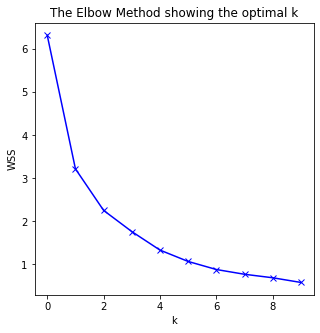

In [45]:
#Elbow Method Graph
K = range(0,10)
plt.figure(figsize=(5,5))
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [46]:
#Set number of clusters
k = 4

#Drop Neighborhood Column
sanfran_grouped_clustering = sanfran_grouped.drop('Neighborhood', axis=1)

#Run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans.fit(sanfran_grouped_clustering)

#Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [47]:
#Add clustering labels to dataframe
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sanfran_merged = sf_coordinates

#Merge toronto_grouped with df_geo to add latitude/longitude for each neighborhood
sanfran_merged = sanfran_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sanfran_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,37.7764,-122.435,0,Bar,Indian Restaurant,Food Truck,Café,Seafood Restaurant,Sushi Restaurant,Record Shop,Pizza Place,Ethiopian Restaurant,Bakery
1,Anza Vista,37.7808,-122.443,0,Café,Coffee Shop,Bus Station,Sandwich Place,Tunnel,Health & Beauty Service,Arts & Crafts Store,Pet Store,Convenience Store,Cosmetics Shop
2,Ashbury Heights,37.7692,-122.448,0,Boutique,Coffee Shop,Bookstore,Gift Shop,Breakfast Spot,Café,Clothing Store,Thrift / Vintage Store,Pizza Place,Bus Station
3,Balboa Hollow,37.7988,-122.436,0,Cosmetics Shop,Gym / Fitness Center,Wine Bar,Italian Restaurant,French Restaurant,Mexican Restaurant,Ice Cream Shop,Salad Place,Deli / Bodega,Motel
4,Balboa Terrace,37.7313,-122.469,0,Light Rail Station,Optical Shop,Intersection,Bakery,Comic Shop,Playground,Sushi Restaurant,Pharmacy,Restaurant,Gym


In [48]:
for (col, col_data) in sanfran_merged.iteritems():
    print("NaN values in ", col, ": ", sanfran_merged[col].isnull().sum())

NaN values in  Neighborhood :  0
NaN values in  Latitude :  0
NaN values in  Longitude :  0
NaN values in  Cluster Labels :  0
NaN values in  1st Most Common Venue :  0
NaN values in  2nd Most Common Venue :  0
NaN values in  3rd Most Common Venue :  0
NaN values in  4th Most Common Venue :  0
NaN values in  5th Most Common Venue :  0
NaN values in  6th Most Common Venue :  0
NaN values in  7th Most Common Venue :  0
NaN values in  8th Most Common Venue :  0
NaN values in  9th Most Common Venue :  0
NaN values in  10th Most Common Venue :  0


In [49]:
sanfran_merged.loc[(sanfran_merged['Cluster Labels'].isnull())]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [50]:
sanfran_merged.drop([2, 53, 96, 117], axis=0, inplace=True)

In [51]:
for (col, col_data) in sanfran_merged.iteritems():
    print("NaN values in ", col, ": ", sanfran_merged[col].isnull().sum())

NaN values in  Neighborhood :  0
NaN values in  Latitude :  0
NaN values in  Longitude :  0
NaN values in  Cluster Labels :  0
NaN values in  1st Most Common Venue :  0
NaN values in  2nd Most Common Venue :  0
NaN values in  3rd Most Common Venue :  0
NaN values in  4th Most Common Venue :  0
NaN values in  5th Most Common Venue :  0
NaN values in  6th Most Common Venue :  0
NaN values in  7th Most Common Venue :  0
NaN values in  8th Most Common Venue :  0
NaN values in  9th Most Common Venue :  0
NaN values in  10th Most Common Venue :  0


In [52]:
centroids = kmeans.cluster_centers_
clat = []
clong = []
for center in centroids:
    clat.append(center[0])
    clong.append(center[1])

In [53]:
#Acquire all labels
cluster_labels = sanfran_merged['Cluster Labels'].unique()

In [54]:
#Create map
map_clusters = folium.Map(location=[latitude_sf, longitude_sf], zoom_start=11)

#Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sanfran_merged['Latitude'], sanfran_merged['Longitude'], sanfran_merged['Neighborhood'], sanfran_merged['Cluster Labels']):
    try:
        cluster = int(cluster)
        
    except Exception:
        pass
        
    label = folium.Popup(str(poi) + ', ' + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
        
for clat_, clong_, cluster_label in zip(clat, clong, cluster_labels):
        clabel = folium.Popup('Centroid ' + str(cluster_label), parse_html=True)
        folium.CircleMarker(
            [clat_, clong_],
            radius=5,
            popup=clabel,
            color='black',
            fill=True,
            fill_color='#FFFF00',
            fill_opacity=1.0,
            parse_html=False).add_to(map_clusters)
       
map_clusters

In [55]:
sanfran_merged.to_csv('sanfran.csv')